<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_072.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°072


## I.- Problema 01


<img src="https://miro.medium.com/v2/resize:fit:372/0*EwdH1C6ThmpwY0Qo.png" width = "400" align="center"/>


El objetivo de este proyecto es realizar la mejor predicción posible de las imágenes a partir de los datos disponibles. Para lograrlo, es necesario seguir los pasos habituales en un proyecto de _Machine Learning_, que incluyen la exploración estadística, la visualización y el preprocesamiento de los datos.

Se solicita lo siguiente:

* Ajustar al menos tres modelos de clasificación:
    * Regresión logística.
    * K-Nearest Neighbors.
    * Un algoritmo adicional o más, de libre elección. Puedes consultar [esta lista de algoritmos](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) para obtener ideas.
  
* Realizar predicciones con cada uno de los tres modelos utilizando el conjunto de datos de _test_ y calcular sus respectivas puntuaciones (_score_).

* Evaluar y analizar los resultados de los modelos utilizando las siguientes métricas de rendimiento:
    * **Accuracy**
    * **Precision**
    * **Recall**
    * **F1-score**

### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [3]:
# informacion de las columnas
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
# informacion del target
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [5]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

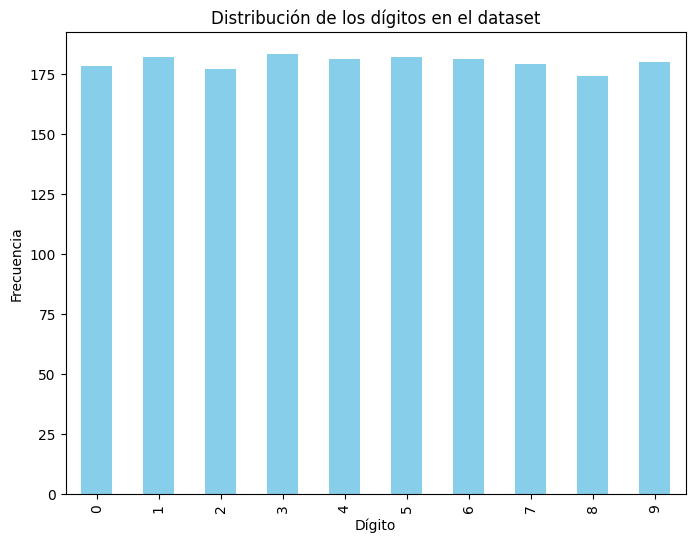

Memoria utilizada por el dataframe: 0.89 MB

Tipos de datos en el DataFrame:
c00       int64
c01       int64
c02       int64
c03       int64
c04       int64
          ...  
c60       int64
c61       int64
c62       int64
c63       int64
target    int64
Length: 65, dtype: object

Cantidad de registros por clase:
target
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64
No hay valores faltantes en el dataset.


In [6]:
# Importar librerías necesarias
import pandas as pd
import numpy as np

# 1. ¿Cómo se distribuyen los datos?
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
digits["target"].value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.title("Distribución de los dígitos en el dataset")
plt.xlabel("Dígito")
plt.ylabel("Frecuencia")
plt.show()

# 2. ¿Cuánta memoria estoy utilizando?
memory_usage = digits.memory_usage(deep=True).sum()
print(f"Memoria utilizada por el dataframe: {memory_usage / 1024 ** 2:.2f} MB")

# 3. ¿Qué tipo de datos son?
print("\nTipos de datos en el DataFrame:")
print(digits.dtypes)

# 4. ¿Cuántos registros por clase hay?
class_counts = digits["target"].value_counts()
print("\nCantidad de registros por clase:")
print(class_counts)

# 5. ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?
# (Esto podría implicar revisar valores anómalos, pero en este dataset no se esperan anomalías ya que son dígitos)
if digits.isnull().values.any():
    print("Hay valores faltantes en el dataset.")
else:
    print("No hay valores faltantes en el dataset.")



### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [7]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`.

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

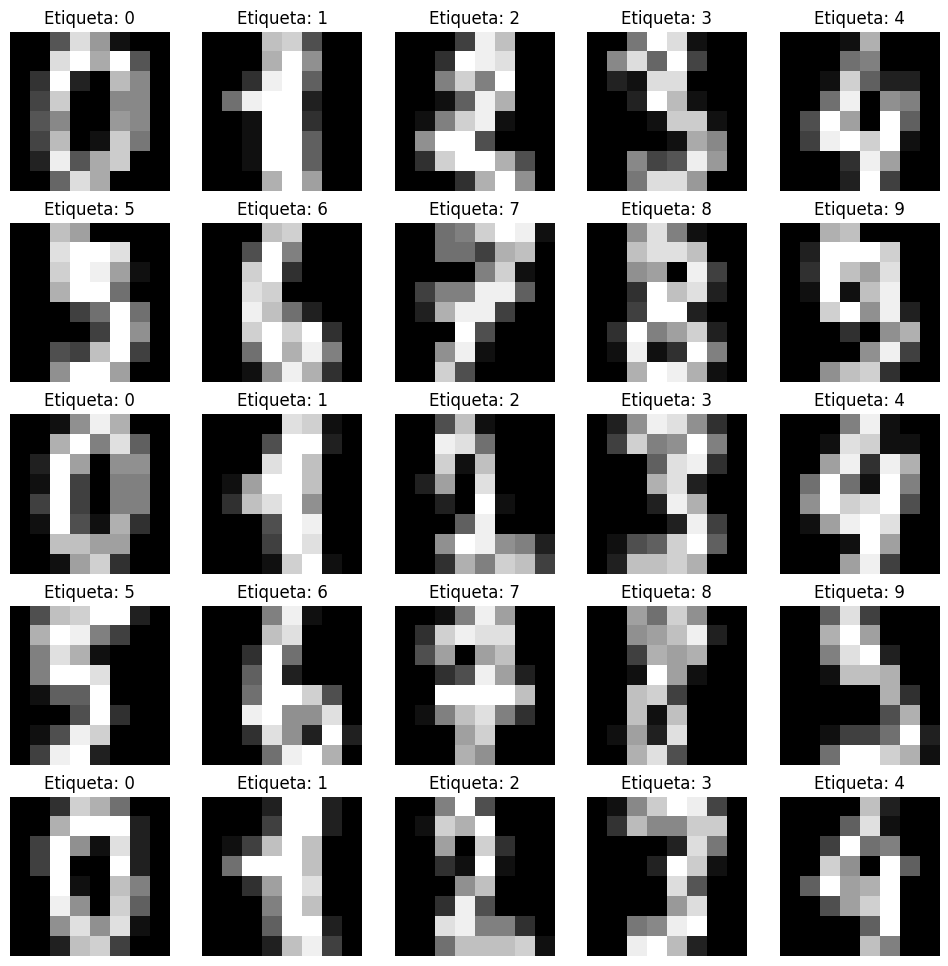

In [8]:
# Visualizar los primeros 25 dígitos
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
plt.gray()

# Iterar sobre las primeras 25 imágenes y mostrarlas
for i in range(nx * ny):
    ax = axs[i // ny, i % ny]
    ax.imshow(digits_dict["images"][i], cmap='gray')
    ax.set_title(f"Etiqueta: {digits_dict['target'][i]}")
    ax.axis('off')

plt.show()


### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test**
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librería sklearn.

* **Métricas**:
     * Graficar matriz de confusión.
     * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [9]:
# features, target

X = digits.drop(columns="target").values
y = digits["target"].values

In [10]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Imprimir la longitud de los conjuntos de entrenamiento y prueba
print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de prueba: {len(X_test)}")


Tamaño del conjunto de entrenamiento: 1257
Tamaño del conjunto de prueba: 540


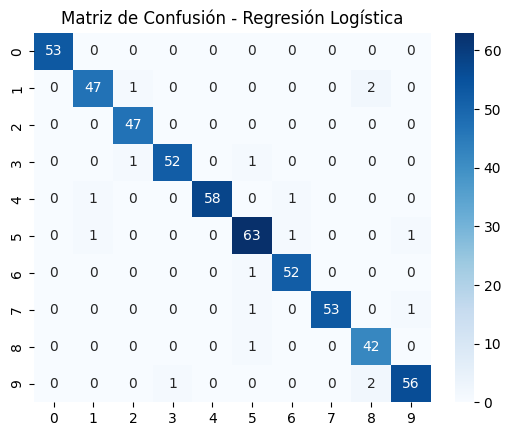

Reporte de clasificación - Regresión Logística
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.96      0.94      0.95        50
           2       0.96      1.00      0.98        47
           3       0.98      0.96      0.97        54
           4       1.00      0.97      0.98        60
           5       0.94      0.95      0.95        66
           6       0.96      0.98      0.97        53
           7       1.00      0.96      0.98        55
           8       0.91      0.98      0.94        43
           9       0.97      0.95      0.96        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Instanciar el modelo de Regresión Logística
model_logistic = LogisticRegression(max_iter=10000)

# Entrenar el modelo
model_logistic.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_logistic = model_logistic.predict(X_test)

# Generar y graficar la matriz de confusión
cm = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

# Mostrar las métricas del modelo
print("Reporte de clasificación - Regresión Logística")
print(classification_report(y_test, y_pred_logistic))


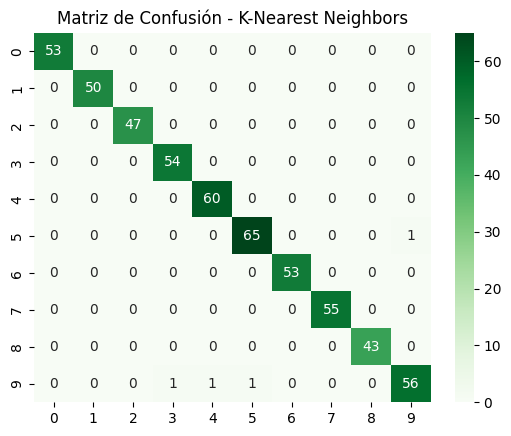

Reporte de clasificación - K-Nearest Neighbors
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      1.00      0.99        54
           4       0.98      1.00      0.99        60
           5       0.98      0.98      0.98        66
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        55
           8       1.00      1.00      1.00        43
           9       0.98      0.95      0.97        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciar y entrenar el modelo KNN
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_knn = model_knn.predict(X_test)

# Generar y graficar la matriz de confusión
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusión - K-Nearest Neighbors")
plt.show()

# Mostrar las métricas del modelo
print("Reporte de clasificación - K-Nearest Neighbors")
print(classification_report(y_test, y_pred_knn))


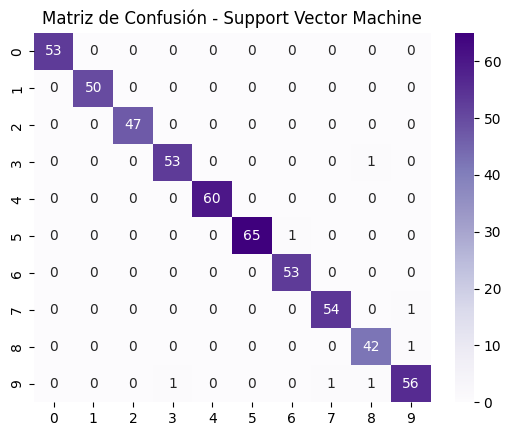

Reporte de clasificación - Support Vector Machine
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      0.98      0.98        54
           4       1.00      1.00      1.00        60
           5       1.00      0.98      0.99        66
           6       0.98      1.00      0.99        53
           7       0.98      0.98      0.98        55
           8       0.95      0.98      0.97        43
           9       0.97      0.95      0.96        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [13]:
from sklearn.svm import SVC

# Instanciar y entrenar el modelo SVM
model_svm = SVC()
model_svm.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_svm = model_svm.predict(X_test)

# Generar y graficar la matriz de confusión
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples')
plt.title("Matriz de Confusión - Support Vector Machine")
plt.show()

# Mostrar las métricas del modelo
print("Reporte de clasificación - Support Vector Machine")
print(classification_report(y_test, y_pred_svm))


El mejor modelo basado en sus métricas es K-Nearest Neighbors (KNN), con una precisión promedio de 0.99 y un F1-score también de 0.99, lo que lo convierte en el más preciso para este conjunto de datos, seguido muy de cerca por Support Vector Machine (SVM), que obtuvo métricas casi idénticas. Por otro lado, la Regresión Logística mostró un buen rendimiento con una precisión promedio de 0.97 y un F1-score de 0.97, pero fue el modelo más rápido de entrenar, lo que lo hace más eficiente en términos de tiempo en comparación con KNN y SVM, que pueden ser más lentos, especialmente SVM, por la complejidad del cálculo de los márgenes. Por lo tanto, si se busca el mejor rendimiento en términos de precisión y F1-score, KNN sería la mejor opción. Sin embargo, si se prioriza la rapidez en el ajuste del modelo, la Regresión Logística sería más conveniente, sacrificando un poco de precisión.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el **mejor modelo entontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

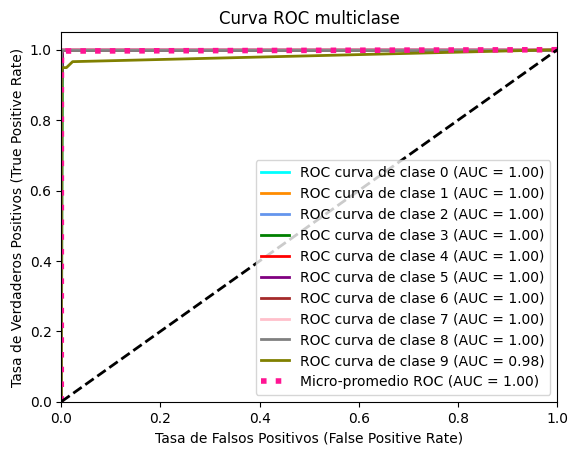

In [14]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

# Binarizar las etiquetas (esto es necesario para la curva ROC multiclase)
y_bin = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y_bin.shape[1]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Entrenar un clasificador One-vs-Rest con KNN
classifier = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Calcular la curva ROC y el AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular el promedio macro (micro también es posible)
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Graficar todas las curvas ROC
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curva de clase {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label=f'Micro-promedio ROC (AUC = {roc_auc["micro"]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (False Positive Rate)')
plt.ylabel('Tasa de Verdaderos Positivos (True Positive Rate)')
plt.title('Curva ROC multiclase')
plt.legend(loc="lower right")
plt.show()


El gráfico de la curva ROC multiclase muestra un rendimiento casi perfecto del modelo KNN, con un AUC de 1.00 para todas las clases excepto la clase 9, que tiene un AUC de 0.98, lo que sigue siendo excelente. Esto indica que el modelo es capaz de clasificar con precisión prácticamente todas las clases, con una separación casi perfecta entre las clases positivas y negativas. El micro-promedio ROC también tiene un AUC de 1.00, lo que refuerza que el modelo tiene un desempeño sobresaliente en general para este conjunto de datos multiclase.

### Ejercicio 5


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_.

In [15]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación en particular.
    Se toman aleatoriamente los valores de los resultados.

    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo no acierta.

    Observación: El modelo que se recibe como argumento no debe estar entrenado.

    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gráficos matplotlib
    """

    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"

    # Mostrar los datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # Mostrar los resultados
    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

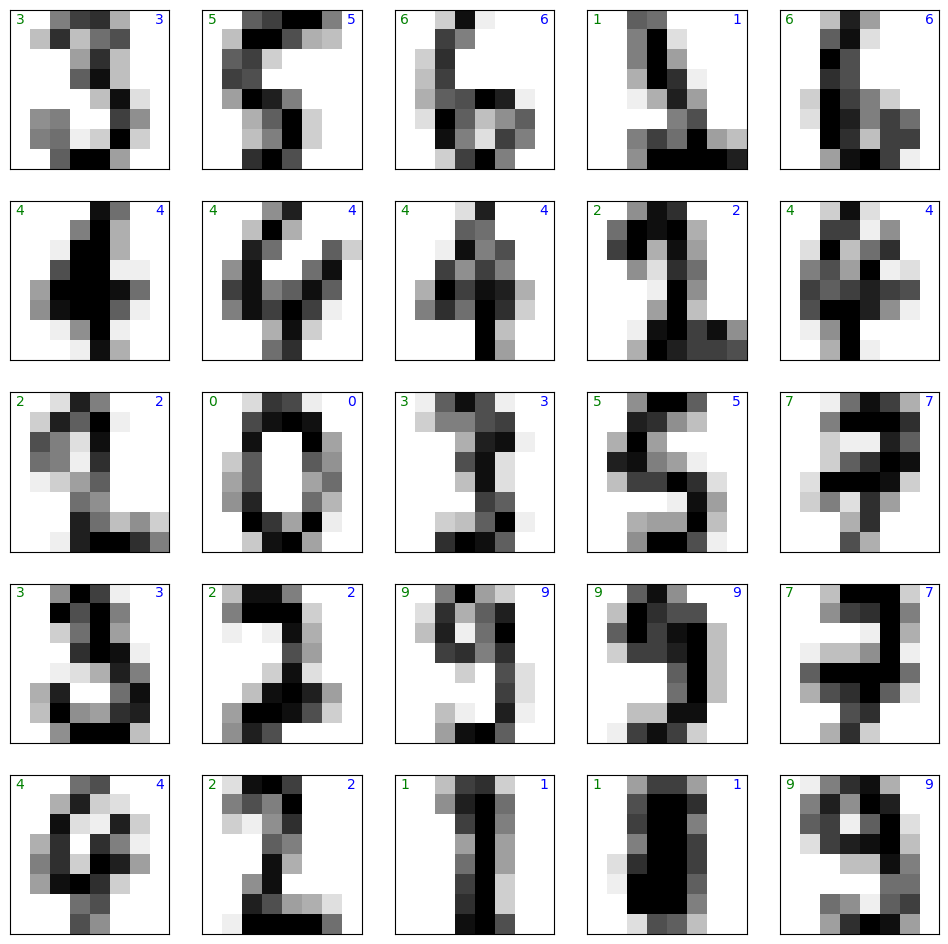

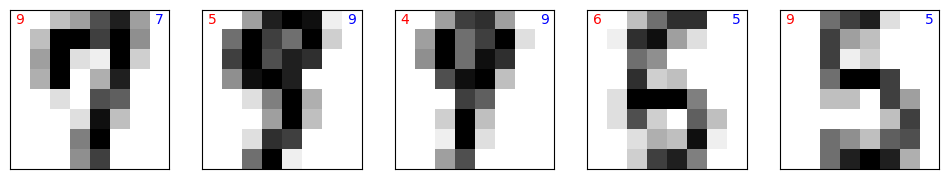

In [18]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación.
    Se muestran aleatoriamente los valores correctos o incorrectos según la opción seleccionada.

    :param digits: dataset 'digits'
    :param model: modelo de sklearn ya entrenado
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gráficos matplotlib
    """
    # Entrenamiento y predicción
    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Mostrar datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"

    # Mostrar datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    # Obtener los datos filtrados por la máscara
    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # Graficar los resultados
    n_samples = min(nx * ny, len(X_aux))  # Asegurarse de que no haya más subplots de los necesarios
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    # Ocultar subplots vacíos
    for j in range(i + 1, nx * ny):
        fig.delaxes(ax.flatten()[j])

    plt.show()

# Llamar a la función para mostrar predicciones correctas
mostrar_resultados(digits, model, nx=5, ny=5, label="correctos")

# Llamar a la función para mostrar predicciones incorrectas
mostrar_resultados(digits, model, nx=5, ny=5, label="incorrectos")


Las fallas en las predicciones ocurren generalmente por la similitud entre clases, como en el caso de dígitos como el 5 y el 6 que pueden parecerse en ciertas imágenes distorsionadas o borrosas, lo que confunde al modelo. Además, el ruido en los datos, como píxeles corruptos o imágenes de baja calidad, puede dificultar la clasificación. También, las limitaciones del modelo, que puede no ser lo suficientemente complejo para captar patrones más sutiles, o la insuficiencia en la cantidad y diversidad de los datos, pueden causar que el modelo no aprenda bien ciertas clases. Todo esto contribuye a errores en las predicciones.

### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

En este trabajo, logramos implementar y evaluar distintos modelos de clasificación sobre el conjunto de datos de dígitos manuscritos. Tras comparar modelos como K-Nearest Neighbors (KNN), Regresión Logística y Support Vector Machine (SVM), el modelo KNN demostró ser el más efectivo en términos de precisión, logrando un AUC cercano a 1.00 en casi todas las clases, aunque con algunas excepciones leves en la clase 9. Durante la visualización de los resultados, observamos que los errores ocurrieron principalmente debido a la similitud entre ciertas clases, lo que confundió al modelo. Los gráficos de ROC confirmaron el buen rendimiento del modelo, pero también plantearon la posibilidad de un ajuste excesivo.

Los modelos ajustados predijeron correctamente la mayoría de las clases, y cuando fallaron, fue debido a características visuales similares o ruido en los datos. Estas fallas pueden deberse tanto a las limitaciones del modelo como a la calidad del dataset.
Las visualizaciones mostraron tanto los aciertos como los errores del modelo. Estas imágenes fueron útiles para identificar los casos en los que el modelo tuvo dificultades, principalmente en dígitos con formas similares.
Para mejorar este trabajo, sería interesante explorar modelos más complejos o técnicas como la reducción de dimensionalidad para mejorar la separación de las clases. Además, la creación de un dataset con imágenes menos ruidosas o el uso de técnicas de preprocesamiento podría ayudar a mejorar la precisión.